# Tarea 2 - Pronóstico de Demanda

## Información Administrativa

- Curso: IN4273 - Gestión de Operaciones
- Facultad: Ciencias Físicas y Matemáticas, Universidad de Chile
- Departamento: Ingeniería Industrial
- Fecha de entrega: Martes 17 de septiembre, 23:59
- Integrantes:
    - Cristian Jara M.
    - Matías Ignacio Saavedra Guerra
    - Maximiliano Farren

## Resumen de la Tarea

Esta tarea se enfoca en la aplicación de técnicas de pronóstico de demanda y planificación de producción en el contexto de la gestión de operaciones. Se divide en dos preguntas principales.

1. Pregunta 1: Esta sección aborda el pronóstico de demanda para TechGadgets Inc., una empresa de dispositivos electrónicos.
2. Pregunta 2: Esta parte se centra en la implementación computacional de modelos de pronóstico para una empresa de venta de café. 

# Pregunta 2

1. Visualizar y analizar series temporales de ventas de café.
2. Implementar y evaluar el modelo de media móvil con diferentes parámetros.
3. Aplicar y analizar el alisamiento exponencial simple con distintos factores de suavizamiento.
4. Implementar y evaluar el doble alisamiento exponencial.
5. Desarrollar y analizar el modelo de triple alisamiento exponencial.
6. Seleccionar y justificar el mejor modelo de pronóstico.
7. Modificar funciones de alisamiento exponencial para pronosticar una semana en el futuro.
8. (Bonus) Analizar patrones de demanda por hora y proponer estrategias comerciales.

# Resolución

Imagine que los dueños de una empresa de venta de café los contrata en búsqueda de asesoría. En específico, quieren mejorar la forma en que estiman la demanda de sus productos, y así, poder
disminuir sus costos o aumentar las ventas.

Esta pregunta tiene como objetivo la implementación de los modelos de pronóstico de demanda vistos en clases. Para esto, se adjunta con la tarea una archivo comprimido “coffee_sales.csv”.

In [6]:
# Se importan las librerías necesarias para la resolución, si alguna no está instalada, se puede instalar con pip install <librería>.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

Grafique la serie de tiempo de las ventas de café y las series de tiempo de las ventas por tipo de café. Detalle y comente sobre los componentes que puede visualizar de las demandas.(Hint: grafique agrupando los datos por día)

In [7]:
# Se carga la base de datos de la empresa de café: coffee_sales.csv
df = pd.read_csv('coffee_sales.csv', sep=';')

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())

           datetime cash_type                 card  money    coffee_name  Hora
0  01-03-2024 10:15      card  ANON-0000-0000-0001    387          Latte    10
1  01-03-2024 12:19      card  ANON-0000-0000-0002    387  Hot Chocolate    12
2  01-03-2024 12:20      card  ANON-0000-0000-0002    387  Hot Chocolate    12
3  01-03-2024 13:46      card  ANON-0000-0000-0003    289      Americano    13
4  01-03-2024 13:48      card  ANON-0000-0000-0004    387          Latte    13


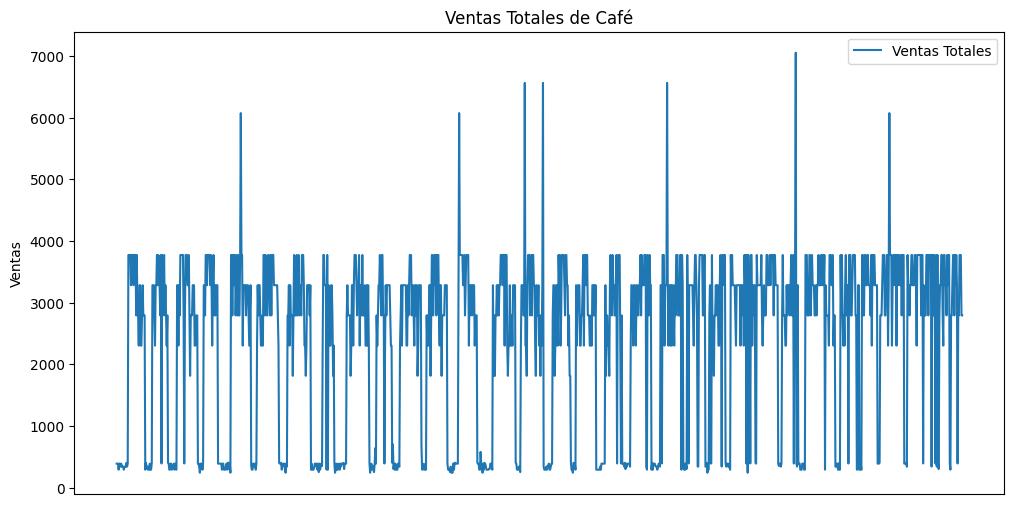

In [17]:
# Agrupar las ventas por fecha
total_sales = df.groupby('datetime')['money'].sum().reset_index()

# Crear el gráfico de ventas totales
plt.figure(figsize=(12, 6))
plt.plot(total_sales['datetime'], total_sales['money'], label='Ventas Totales')
plt.xlabel('Fecha')
plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel('Ventas')
plt.title('Ventas Totales de Café')
plt.legend()

# Guardar la figura
plt.savefig('img/p2_ventas_totales.png')

# Mostrar la figura
plt.show()

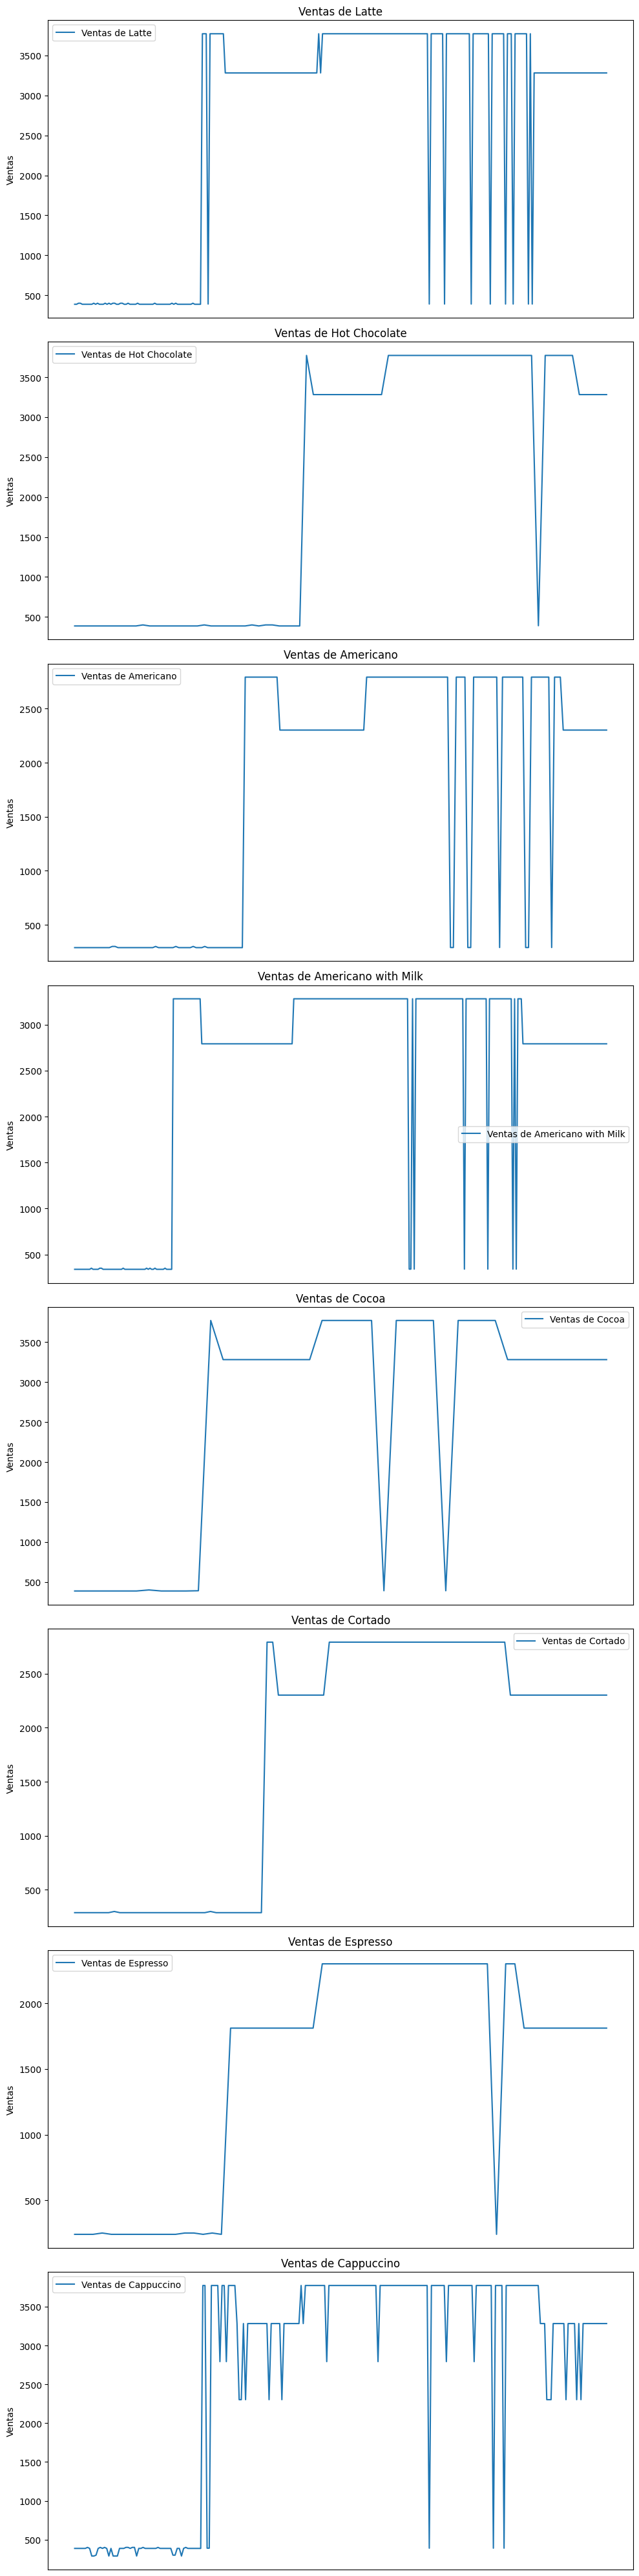

In [14]:
# Lista de tipos de café
coffee_types = df['coffee_name'].unique()

# Crear una figura y un conjunto de subplots
fig, axes = plt.subplots(len(coffee_types), 1, figsize=(10, 5 * len(coffee_types)))

# Iterar sobre cada tipo de café y crear un gráfico separado
for i, coffee in enumerate(coffee_types):
    axes[i].plot(df[df['coffee_name'] == coffee]['datetime'], df[df['coffee_name'] == coffee]['money'], label=f'Ventas de {coffee}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Ventas')
    axes[i].set_title(f'Ventas de {coffee}')
    axes[i].legend()
    axes[i].axes.get_xaxis().set_visible(False)

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()

# Guardar la figura
plt.savefig('img/p2_ventas_cafe_por_tipo.png')

# Mostrar la figura
plt.show()